In [40]:
import torch
from matplotlib import pyplot as plt
from utils import processText, get_batch,data_loader
from model import CBOWHierarchicalSoftmax
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [41]:
# 输入的文本
filepath = '../text_txt/1.txt'
raw_text = data_loader(filepath)[0:5000]
print(len(processText(raw_text)))

842


In [42]:
# Global Variables
# 输入是1*V的矩阵，V是词汇表的大小
EMDEDDING_DIM = 100  # 词向量维度, 词向量的维度一般是50, 100, 200, 300维, 是矩阵的列数
EPOCHS_NUM = 50  # 训练的轮数
INCREMENTAL_NUM = 5
BATCH_SIZE = 100

In [43]:
def run_pic(epochs_num):
    accuracy_List = []
    train_time_List = []
    predict_time_List = []
    for i in range(0,INCREMENTAL_NUM):
        if i == 0:
            # 初始化一个模型
            new_text = processText(raw_text)[i*BATCH_SIZE:(i+1)*BATCH_SIZE]
            cbow_model = CBOWHierarchicalSoftmax(new_text,EMDEDDING_DIM, device)
            training_data = get_batch(new_text)
            train_time_cost = cbow_model.train(training_data,epochs_num=epochs_num)
            validation_data = training_data # 用训练数据来验证
            predict_time_cost, accuracy = cbow_model.predict(validation_data)
        else:
            new_text = processText(raw_text)[i*BATCH_SIZE:(i+1)*BATCH_SIZE]
            cbow_model.update_new_data(new_text)
            training_data = get_batch(new_text)
            train_time_cost = cbow_model.train(training_data,epochs_num=EPOCHS_NUM)
            validation_data = training_data # 用训练数据来验证
            predict_time_cost, accuracy = cbow_model.predict(validation_data)
        accuracy_List.append(accuracy)
        train_time_List.append(train_time_cost)
        predict_time_List.append(predict_time_cost)
    all_text = processText(raw_text)[0:INCREMENTAL_NUM * BATCH_SIZE]
    training_data = get_batch(all_text)
    predict_time_cost, all_data_accuracy = cbow_model.predict(training_data)
    predict_time_List.append(predict_time_cost)
    return accuracy_List, train_time_List, predict_time_List,all_data_accuracy


In [44]:
epoch_list = [10,50,100,200,300,400,500,600,700,800,900,1000]
alists = []
tlist = []
plist = []
adlist = []
for e in epoch_list:
    accuracy_List, train_time_List, predict_time_List,all_data_accuracy = run_pic(e)
    alists.append(accuracy_List)
    tlist.append(train_time_List)
    plist.append(predict_time_List)
    adlist.append(all_data_accuracy)

100%|██████████| 10/10 [00:01<00:00,  5.05it/s, epoch=9, loss=tensor([[68.9360]]), target=och]            


训练时间: 1.9804019927978516s

预测花费时间: 0.011602163314819336s

正确率: 37.5%



100%|██████████| 50/50 [00:14<00:00,  3.46it/s, epoch=49, loss=tensor([[55.3159]], grad_fn=<AddBackward0>), target=11]              


训练时间: 14.45159912109375s

预测花费时间: 0.01733565330505371s

正确率: 91.66666666666666%



100%|██████████| 50/50 [00:15<00:00,  3.16it/s, epoch=49, loss=tensor([[62.4359]], grad_fn=<AddBackward0>), target=blåste]     


训练时间: 15.837013006210327s

预测花费时间: 0.01912713050842285s

正确率: 93.75%



100%|██████████| 50/50 [00:15<00:00,  3.22it/s, epoch=49, loss=tensor([[48.1350]], grad_fn=<AddBackward0>), target=oss]         


训练时间: 15.506259202957153s

预测花费时间: 0.019989013671875s

正确率: 92.70833333333334%



100%|██████████| 50/50 [00:14<00:00,  3.34it/s, epoch=49, loss=tensor([[105.2392]], grad_fn=<AddBackward0>), target=mark]       


训练时间: 14.97976303100586s

预测花费时间: 0.016515731811523438s

正确率: 87.5%

预测花费时间: 0.07278990745544434s

正确率: 43.346774193548384%



100%|██████████| 50/50 [00:08<00:00,  5.85it/s, epoch=49, loss=tensor([[48.9207]]), target=och]            


训练时间: 8.546240091323853s

预测花费时间: 0.009922027587890625s

正确率: 86.45833333333334%



100%|██████████| 50/50 [00:12<00:00,  4.16it/s, epoch=49, loss=tensor([[39.8059]], grad_fn=<AddBackward0>), target=11]              


训练时间: 12.005622863769531s

预测花费时间: 0.015913963317871094s

正确率: 94.79166666666666%



100%|██████████| 50/50 [00:14<00:00,  3.43it/s, epoch=49, loss=tensor([[28.9115]], grad_fn=<AddBackward0>), target=blåste]      


训练时间: 14.570466995239258s

预测花费时间: 0.018007993698120117s

正确率: 92.70833333333334%



100%|██████████| 50/50 [00:14<00:00,  3.48it/s, epoch=49, loss=tensor([[98.3661]], grad_fn=<AddBackward0>), target=oss]         


训练时间: 14.34902310371399s

预测花费时间: 0.01964092254638672s

正确率: 89.58333333333334%



100%|██████████| 50/50 [00:14<00:00,  3.55it/s, epoch=49, loss=tensor([[95.9144]], grad_fn=<AddBackward0>), target=mark]        


训练时间: 14.103092908859253s

预测花费时间: 0.017834901809692383s

正确率: 86.45833333333334%

预测花费时间: 0.07771706581115723s

正确率: 50.201612903225815%



100%|██████████| 100/100 [00:17<00:00,  5.70it/s, epoch=99, loss=tensor([[95.7081]]), target=och]           


训练时间: 17.549754858016968s

预测花费时间: 0.010793924331665039s

正确率: 94.79166666666666%



100%|██████████| 50/50 [00:11<00:00,  4.17it/s, epoch=49, loss=tensor([[63.5329]], grad_fn=<AddBackward0>), target=11]              


训练时间: 11.98020076751709s

预测花费时间: 0.015697240829467773s

正确率: 92.70833333333334%



100%|██████████| 50/50 [00:13<00:00,  3.66it/s, epoch=49, loss=tensor([[31.3983]], grad_fn=<AddBackward0>), target=blåste]     


训练时间: 13.660045862197876s

预测花费时间: 0.018690109252929688s

正确率: 88.54166666666666%



100%|██████████| 50/50 [00:13<00:00,  3.71it/s, epoch=49, loss=tensor([[142.9621]], grad_fn=<AddBackward0>), target=oss]        


训练时间: 13.494976997375488s

预测花费时间: 0.017528772354125977s

正确率: 88.54166666666666%



100%|██████████| 50/50 [00:13<00:00,  3.59it/s, epoch=49, loss=tensor([[129.4657]], grad_fn=<AddBackward0>), target=mark]       


训练时间: 13.935428857803345s

预测花费时间: 0.016427993774414062s

正确率: 90.625%

预测花费时间: 0.07318401336669922s

正确率: 49.193548387096776%



100%|██████████| 200/200 [00:35<00:00,  5.66it/s, epoch=199, loss=tensor([[48.8724]]), target=och]            


训练时间: 35.35489201545715s

预测花费时间: 0.009828805923461914s

正确率: 96.875%



100%|██████████| 50/50 [00:11<00:00,  4.18it/s, epoch=49, loss=tensor([[94.2556]], grad_fn=<AddBackward0>), target=11]               


训练时间: 11.9665846824646s

预测花费时间: 0.01552891731262207s

正确率: 97.91666666666666%



100%|██████████| 50/50 [00:13<00:00,  3.79it/s, epoch=49, loss=tensor([[63.6322]], grad_fn=<AddBackward0>), target=blåste]     


训练时间: 13.19376802444458s

预测花费时间: 0.01752495765686035s

正确率: 92.70833333333334%



100%|██████████| 50/50 [00:14<00:00,  3.56it/s, epoch=49, loss=tensor([[70.2348]], grad_fn=<AddBackward0>), target=oss]         


训练时间: 14.056288003921509s

预测花费时间: 0.01708388328552246s

正确率: 87.5%



100%|██████████| 50/50 [00:15<00:00,  3.29it/s, epoch=49, loss=tensor([[143.1100]], grad_fn=<AddBackward0>), target=mark]       


训练时间: 15.18568229675293s

预测花费时间: 0.021981239318847656s

正确率: 87.5%

预测花费时间: 0.08657002449035645s

正确率: 48.79032258064516%



100%|██████████| 300/300 [01:00<00:00,  4.92it/s, epoch=299, loss=tensor([[63.0012]]), target=och]            


训练时间: 60.984291076660156s

预测花费时间: 0.011195182800292969s

正确率: 97.91666666666666%



100%|██████████| 50/50 [00:13<00:00,  3.64it/s, epoch=49, loss=tensor([[83.0700]], grad_fn=<AddBackward0>), target=11]              


训练时间: 13.744991064071655s

预测花费时间: 0.01594710350036621s

正确率: 96.875%



100%|██████████| 50/50 [00:15<00:00,  3.22it/s, epoch=49, loss=tensor([[54.7934]], grad_fn=<AddBackward0>), target=blåste]     


训练时间: 15.521935939788818s

预测花费时间: 0.017614126205444336s

正确率: 94.79166666666666%



100%|██████████| 50/50 [00:14<00:00,  3.37it/s, epoch=49, loss=tensor([[110.9855]], grad_fn=<AddBackward0>), target=oss]         


训练时间: 14.859900951385498s

预测花费时间: 0.017353057861328125s

正确率: 87.5%



100%|██████████| 50/50 [00:13<00:00,  3.82it/s, epoch=49, loss=tensor([[92.2690]], grad_fn=<AddBackward0>), target=mark]        


训练时间: 13.087362051010132s

预测花费时间: 0.016717195510864258s

正确率: 88.54166666666666%

预测花费时间: 0.07358098030090332s

正确率: 53.2258064516129%



100%|██████████| 400/400 [01:06<00:00,  6.04it/s, epoch=399, loss=tensor([[87.7399]]), target=och]            


训练时间: 66.19246315956116s

预测花费时间: 0.010654211044311523s

正确率: 97.91666666666666%



100%|██████████| 50/50 [00:11<00:00,  4.31it/s, epoch=49, loss=tensor([[80.7589]], grad_fn=<AddBackward0>), target=11]              


训练时间: 11.592482089996338s

预测花费时间: 0.016477108001708984s

正确率: 92.70833333333334%



100%|██████████| 50/50 [00:12<00:00,  3.90it/s, epoch=49, loss=tensor([[54.2692]], grad_fn=<AddBackward0>), target=blåste]     


训练时间: 12.808168888092041s

预测花费时间: 0.017264127731323242s

正确率: 90.625%



100%|██████████| 50/50 [00:13<00:00,  3.84it/s, epoch=49, loss=tensor([[73.2405]], grad_fn=<AddBackward0>), target=oss]         


训练时间: 13.032247066497803s

预测花费时间: 0.01659226417541504s

正确率: 86.45833333333334%



100%|██████████| 50/50 [00:12<00:00,  3.99it/s, epoch=49, loss=tensor([[153.4129]], grad_fn=<AddBackward0>), target=mark]       


训练时间: 12.536567211151123s

预测花费时间: 0.017745018005371094s

正确率: 89.58333333333334%

预测花费时间: 0.07601499557495117s

正确率: 50.60483870967742%



100%|██████████| 500/500 [01:22<00:00,  6.07it/s, epoch=499, loss=tensor([[134.7411]]), target=och]           


训练时间: 82.43464589118958s

预测花费时间: 0.009761810302734375s

正确率: 97.91666666666666%



100%|██████████| 50/50 [00:11<00:00,  4.31it/s, epoch=49, loss=tensor([[56.2210]], grad_fn=<AddBackward0>), target=11]              


训练时间: 11.593481302261353s

预测花费时间: 0.015276193618774414s

正确率: 95.83333333333334%



100%|██████████| 50/50 [00:12<00:00,  3.88it/s, epoch=49, loss=tensor([[62.7795]], grad_fn=<AddBackward0>), target=blåste]     


训练时间: 12.889256000518799s

预测花费时间: 0.016573190689086914s

正确率: 89.58333333333334%



100%|██████████| 50/50 [00:12<00:00,  3.88it/s, epoch=49, loss=tensor([[137.9269]], grad_fn=<AddBackward0>), target=oss]        


训练时间: 12.872829914093018s

预测花费时间: 0.016585826873779297s

正确率: 85.41666666666666%



100%|██████████| 50/50 [00:12<00:00,  3.93it/s, epoch=49, loss=tensor([[125.3215]], grad_fn=<AddBackward0>), target=mark]       


训练时间: 12.719122171401978s

预测花费时间: 0.016827106475830078s

正确率: 91.66666666666666%

预测花费时间: 0.07262396812438965s

正确率: 49.193548387096776%



100%|██████████| 600/600 [01:38<00:00,  6.07it/s, epoch=599, loss=tensor([[69.2029]]), target=och]            


训练时间: 98.92221212387085s

预测花费时间: 0.010079145431518555s

正确率: 98.95833333333334%



100%|██████████| 50/50 [00:11<00:00,  4.32it/s, epoch=49, loss=tensor([[47.8270]], grad_fn=<AddBackward0>), target=11]               


训练时间: 11.571393013000488s

预测花费时间: 0.015739917755126953s

正确率: 93.75%



100%|██████████| 50/50 [00:12<00:00,  3.90it/s, epoch=49, loss=tensor([[37.7719]], grad_fn=<AddBackward0>), target=blåste]     


训练时间: 12.809246063232422s

预测花费时间: 0.017286300659179688s

正确率: 90.625%



100%|██████████| 50/50 [00:12<00:00,  3.90it/s, epoch=49, loss=tensor([[98.9051]], grad_fn=<AddBackward0>), target=oss]         


训练时间: 12.824272155761719s

预测花费时间: 0.017214059829711914s

正确率: 95.83333333333334%



100%|██████████| 50/50 [00:12<00:00,  3.96it/s, epoch=49, loss=tensor([[153.2082]], grad_fn=<AddBackward0>), target=mark]       


训练时间: 12.636090993881226s

预测花费时间: 0.01780390739440918s

正确率: 85.41666666666666%

预测花费时间: 0.07590794563293457s

正确率: 51.20967741935484%



100%|██████████| 700/700 [01:55<00:00,  6.08it/s, epoch=699, loss=tensor([[68.9940]]), target=och]            


训练时间: 115.08442282676697s

预测花费时间: 0.010492086410522461s

正确率: 98.95833333333334%



100%|██████████| 50/50 [00:12<00:00,  3.88it/s, epoch=49, loss=tensor([[72.4913]], grad_fn=<AddBackward0>), target=11]              


训练时间: 12.882663011550903s

预测花费时间: 0.015390872955322266s

正确率: 90.625%



100%|██████████| 50/50 [00:13<00:00,  3.76it/s, epoch=49, loss=tensor([[43.6831]], grad_fn=<AddBackward0>), target=blåste]     


训练时间: 13.294159173965454s

预测花费时间: 0.017152070999145508s

正确率: 93.75%



100%|██████████| 50/50 [00:13<00:00,  3.74it/s, epoch=49, loss=tensor([[113.2031]], grad_fn=<AddBackward0>), target=oss]        


训练时间: 13.370084762573242s

预测花费时间: 0.017522811889648438s

正确率: 83.33333333333334%



100%|██████████| 50/50 [00:12<00:00,  3.85it/s, epoch=49, loss=tensor([[156.9500]], grad_fn=<AddBackward0>), target=mark]       


训练时间: 12.988933324813843s

预测花费时间: 0.016194820404052734s

正确率: 89.58333333333334%

预测花费时间: 0.07200193405151367s

正确率: 52.21774193548387%



100%|██████████| 800/800 [02:15<00:00,  5.90it/s, epoch=799, loss=tensor([[80.0995]]), target=och]            


训练时间: 135.66090488433838s

预测花费时间: 0.009936094284057617s

正确率: 100.0%



100%|██████████| 50/50 [00:12<00:00,  4.09it/s, epoch=49, loss=tensor([[90.2558]], grad_fn=<AddBackward0>), target=11]              


训练时间: 12.211191892623901s

预测花费时间: 0.0157468318939209s

正确率: 92.70833333333334%



100%|██████████| 50/50 [00:13<00:00,  3.80it/s, epoch=49, loss=tensor([[71.7822]], grad_fn=<AddBackward0>), target=blåste]     


训练时间: 13.157907962799072s

预测花费时间: 0.016093969345092773s

正确率: 91.66666666666666%



100%|██████████| 50/50 [00:13<00:00,  3.73it/s, epoch=49, loss=tensor([[135.3527]], grad_fn=<AddBackward0>), target=oss]         


训练时间: 13.42362380027771s

预测花费时间: 0.01727890968322754s

正确率: 86.45833333333334%



100%|██████████| 50/50 [00:12<00:00,  3.85it/s, epoch=49, loss=tensor([[83.3032]], grad_fn=<AddBackward0>), target=mark]        


训练时间: 12.978238821029663s

预测花费时间: 0.016725778579711914s

正确率: 91.66666666666666%

预测花费时间: 0.07262325286865234s

正确率: 52.016129032258064%



100%|██████████| 900/900 [02:33<00:00,  5.87it/s, epoch=899, loss=tensor([[51.5443]]), target=och]            


训练时间: 153.2229299545288s

预测花费时间: 0.010106086730957031s

正确率: 100.0%



100%|██████████| 50/50 [00:12<00:00,  4.06it/s, epoch=49, loss=tensor([[46.3848]], grad_fn=<AddBackward0>), target=11]              


训练时间: 12.309238910675049s

预测花费时间: 0.021917104721069336s

正确率: 94.79166666666666%



100%|██████████| 50/50 [00:13<00:00,  3.64it/s, epoch=49, loss=tensor([[73.8054]], grad_fn=<AddBackward0>), target=blåste]     


训练时间: 13.721467733383179s

预测花费时间: 0.017343997955322266s

正确率: 89.58333333333334%



100%|██████████| 50/50 [00:13<00:00,  3.61it/s, epoch=49, loss=tensor([[78.4385]], grad_fn=<AddBackward0>), target=oss]         


训练时间: 13.854580402374268s

预测花费时间: 0.0174562931060791s

正确率: 92.70833333333334%



100%|██████████| 50/50 [00:13<00:00,  3.83it/s, epoch=49, loss=tensor([[116.3825]], grad_fn=<AddBackward0>), target=mark]       


训练时间: 13.053485870361328s

预测花费时间: 0.016431808471679688s

正确率: 93.75%

预测花费时间: 0.07562375068664551s

正确率: 50.806451612903224%



100%|██████████| 1000/1000 [02:52<00:00,  5.79it/s, epoch=999, loss=tensor([[76.7794]]), target=och]           


训练时间: 172.8183102607727s

预测花费时间: 0.010137081146240234s

正确率: 100.0%



100%|██████████| 50/50 [00:12<00:00,  4.16it/s, epoch=49, loss=tensor([[48.0404]], grad_fn=<AddBackward0>), target=11]              


训练时间: 12.008909225463867s

预测花费时间: 0.0152740478515625s

正确率: 92.70833333333334%



100%|██████████| 50/50 [00:13<00:00,  3.82it/s, epoch=49, loss=tensor([[91.4711]], grad_fn=<AddBackward0>), target=blåste]     


训练时间: 13.088255405426025s

预测花费时间: 0.017394304275512695s

正确率: 92.70833333333334%



100%|██████████| 50/50 [00:13<00:00,  3.78it/s, epoch=49, loss=tensor([[108.2531]], grad_fn=<AddBackward0>), target=oss]        


训练时间: 13.222327947616577s

预测花费时间: 0.016962766647338867s

正确率: 86.45833333333334%



100%|██████████| 50/50 [00:12<00:00,  3.92it/s, epoch=49, loss=tensor([[181.5283]], grad_fn=<AddBackward0>), target=mark]       


训练时间: 12.750833988189697s

预测花费时间: 0.016927003860473633s

正确率: 83.33333333333334%

预测花费时间: 0.07455301284790039s

正确率: 53.83064516129033%



[[37.5, 91.66666666666666, 93.75, 92.70833333333334, 87.5], [86.45833333333334, 94.79166666666666, 92.70833333333334, 89.58333333333334, 86.45833333333334], [94.79166666666666, 92.70833333333334, 88.54166666666666, 88.54166666666666, 90.625], [96.875, 97.91666666666666, 92.70833333333334, 87.5, 87.5], [97.91666666666666, 96.875, 94.79166666666666, 87.5, 88.54166666666666], [97.91666666666666, 92.70833333333334, 90.625, 86.45833333333334, 89.58333333333334], [97.91666666666666, 95.83333333333334, 89.58333333333334, 85.41666666666666, 91.66666666666666], [98.95833333333334, 93.75, 90.625, 95.83333333333334, 85.41666666666666], [98.95833333333334, 90.625, 93.75, 83.33333333333334, 89.58333333333334], [100.0, 92.70833333333334, 91.66666666666666, 86.45833333333334, 91.66666666666666], [100.0, 94.79166666666666, 89.58333333333334, 92.70833333333334, 93.75], [100.0, 92.70833333333334, 92.70833333333334, 86.45833333333334, 83.33333333333334]]
[43.346774193548384, 50.201612903225815, 49.193548

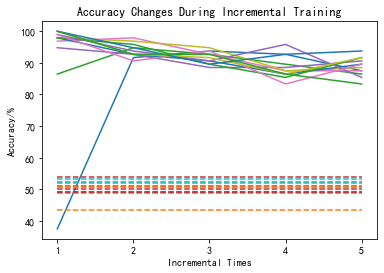

In [49]:
def plot_pic(num):
    for k in range(num):
        plt.plot([i for i in range(1,len(alists[k]) + 1)],alists[k],label='IDA '+str(epoch_list[k]) + ' Epochs')
        plt.plot([i for i in range(1,len(alists[k]) + 1)],[adlist[k] for i in range(len(alists[k]))],linestyle='--',label='ADA '+str(epoch_list[k]) + ' Epochs')

print(alists)
print(adlist)
plot_pic(len(epoch_list))
from matplotlib.ticker import MaxNLocator
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True)) # 设置坐标轴为整数
plt.title('Accuracy Changes During Incremental Training')
plt.ylabel('Accuracy/%')

plt.xlabel('Incremental Times')
# plt.legend(loc='center right')
plt.savefig('./Accuracy Changes During Incremental Training.png',dpi=600)

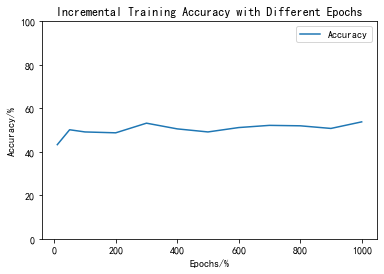

In [51]:
plt.plot(epoch_list,adlist)
plt.ylim((0, 100))
plt.title('Incremental Training Accuracy with Different Epochs')
plt.ylabel('Accuracy/%')
plt.xlabel('Epochs/%')
plt.legend(['Accuracy'], loc='upper right')
plt.savefig('./Incremental Training Accuracy with Different Epochs',dpi=600)

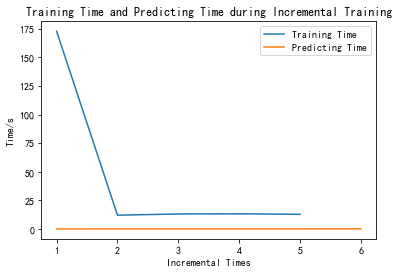

In [47]:
plt.title('Training Time and Predicting Time during Incremental Training')
plt.plot([i for i in range(1, len(train_time_List) + 1)],train_time_List)
plt.plot([i for i in range(1, len(predict_time_List) + 1)],predict_time_List)
plt.xlabel('Incremental Times')
plt.ylabel('Time/s')
plt.legend(['Training Time', 'Predicting Time'], loc='upper right')